# Módulo 07, Tarefa 01

Vamos começar a mexer na nossa base de projeto? Já fizemos um exercício de montar a variável resposta, já pudemos perceber que essa atividade pode não ser trivial. Vamos agora trabalhar a base para que fique propícia ao *scikitlearn* para trabalharmos.

Lembrando, a base se chama demo01.csv, e originalmente está publicada [aqui](https://www.kaggle.com/rikdifos/credit-card-approval-prediction).

#### 1) Carregue a base e avalie:

- As variáveis
- Tipos de dados de cada variável
- Quantidade de missings
- Distribuição da variável resposta (mau)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Carregando a base de dados e visualizando os 5 primeiros registros
dados = pd.read_csv("./demo01.csv")
dados.head()

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


In [3]:
# tipos de dados e número de linhas e colunas
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

In [4]:
# dados ausentes/faltantes
dados.isnull().sum()

sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
possui_celular           0
possui_fone_comercial    0
possui_fone              0
possui_email             0
qt_pessoas_residencia    0
mau                      0
dtype: int64

<AxesSubplot:xlabel='mau', ylabel='count'>

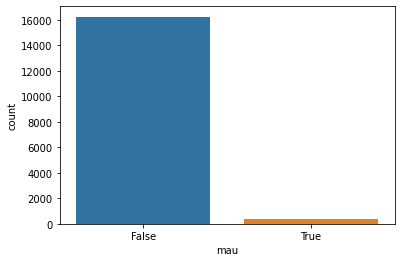

In [5]:
# Distribuição da variável 'mau' 
sns.countplot(data=dados, x='mau')

#### 2) Vamos montar um metadados

1. Crie um dataframe com os nomes de cada variável e o tipo de dados de cada variável.
2. Adicione uma coluna nesse *dataframe* chamada "qtd_categorias" e coloque nela o número de categorias correspondente de cada variável. 
    Dica: 
        1. inicie uma lista vazia
        2. faça um for ao longo dos nomes das variáveis, 
        3. conte o número de categorias dessa variável 
        4. acumule essa informação de 3. na lista que você criou em 1. 
        5. No final, essa lista pode ser atribuída à nossa variável.
3. Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}.

In [6]:
dados_df = pd.DataFrame(dados.dtypes)
dados_df

,0
sexo,object
posse_de_veiculo,object
posse_de_imovel,object
qtd_filhos,int64
tipo_renda,object
educacao,object
estado_civil,object
tipo_residencia,object
idade,float64
tempo_emprego,float64


In [7]:
categorias = []
for i in dados_df.index:
    categorias.append(dados_df.nunique())
dados_df['qtd_categorias'] = categorias
dados_df

,0,qtd_categorias
sexo,object,0 4 dtype: int64
posse_de_veiculo,object,0 4 dtype: int64
posse_de_imovel,object,0 4 dtype: int64
qtd_filhos,int64,0 4 dtype: int64
tipo_renda,object,0 4 dtype: int64
educacao,object,0 4 dtype: int64
estado_civil,object,0 4 dtype: int64
tipo_residencia,object,0 4 dtype: int64
idade,float64,0 4 dtype: int64
tempo_emprego,float64,0 4 dtype: int64


#### 3) Crie variáveis dummy para as variáveis necessárias (i.e. aquelas que são qualitativas e não estão armazenadas como {0, 1} ou {True, False}. Crie um *dataframe* apenas com as variáveis apropriadas para entrada no scikitlearn - elimine as variáveis tipo *str*, mantendo apenas suas versões *dummy*.

In [8]:
dados = pd.get_dummies(dados, columns=['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)
dados.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,1,1,0,0,0,1,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,1,0,0,1,0,1,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,1,0,0,0,1,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,1,0,0,0,1,0,0,0,0


#### 4) Qual variável é mais poderosa?

Considere as variáveis ```possui_email``` e ```posse_de_veiculo```. Faça uma tabela cruzada entre elas e responda qual delas te parece mais poderosa para prever a probabilidade de ```mau = 1```?

In [10]:
pd.crosstab(dados['possui_email'], [dados['posse_de_veiculo_Y']])

posse_de_veiculo_Y,0,1
possui_email,,
0,9341,5829
1,837,643


#### 5) Salve a base, pois ela será utilizada no final deste módulo.

In [ ]:
dados.to_csv('analise_credito.csv')